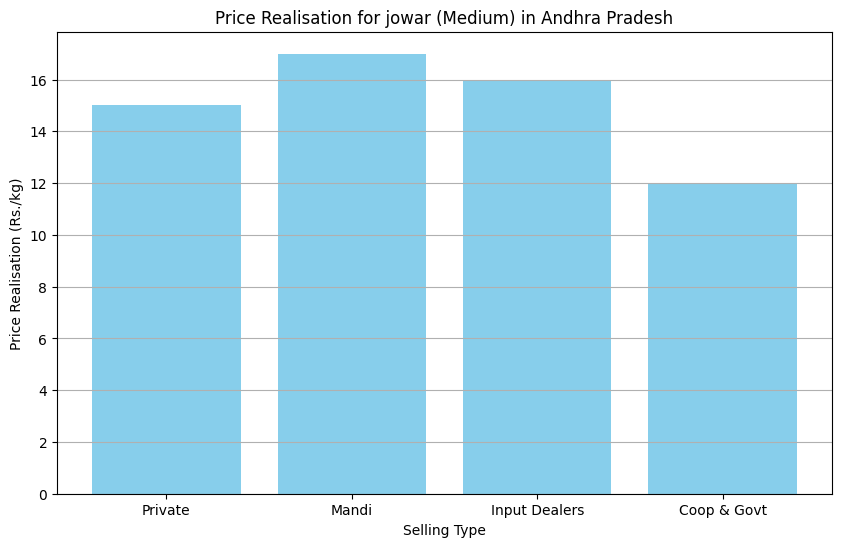

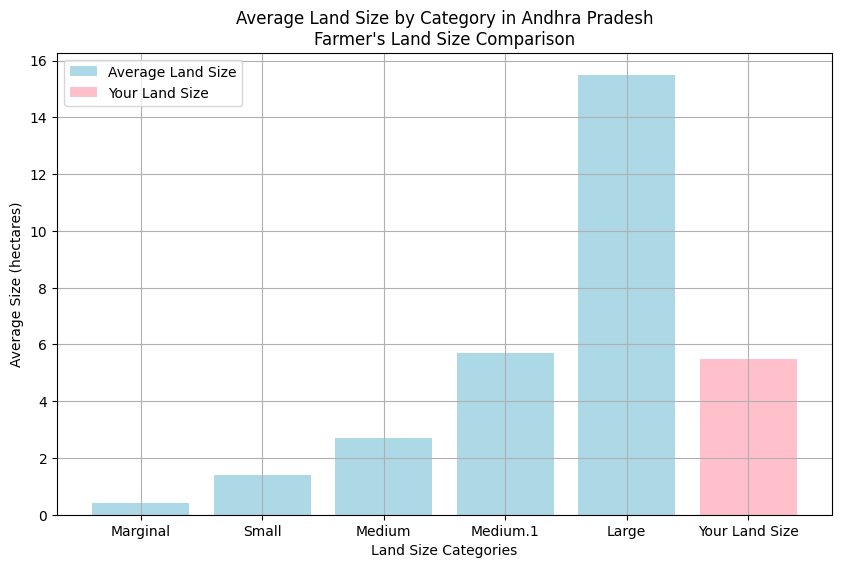

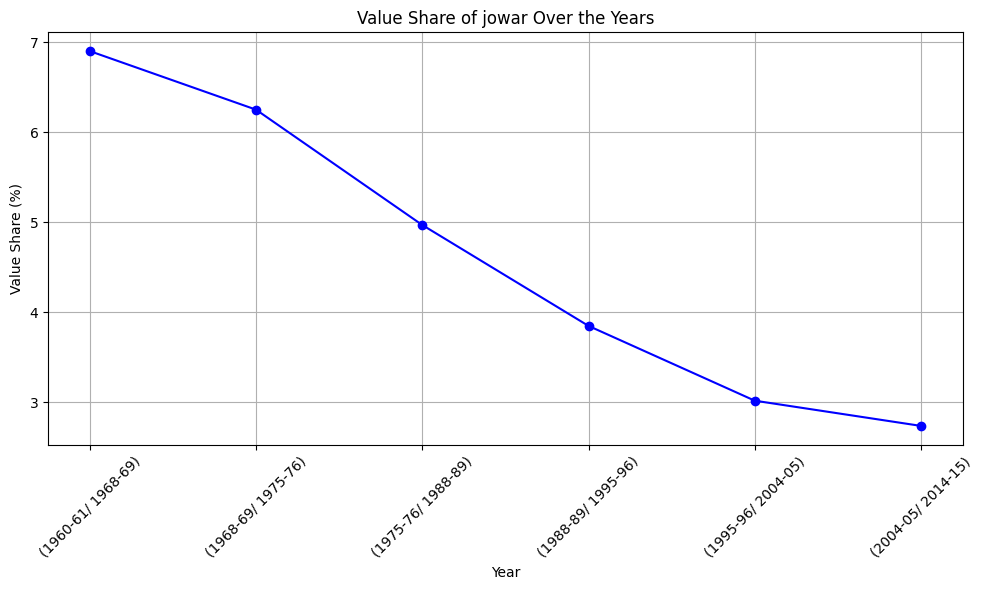

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

class AgriculturalAnalysis:
    def __init__(self, state, crop, hectares):
        self.state = state
        self.crop = crop
        self.hectares = hectares
        
        # Load datasets
        self.price_datasets = {
            'Local': '4.3local.csv',
            'Private': '4.3private.csv',
            'Mandi': '4.3mandi.csv',
            'Input Dealers': '4.3inputdealers.csv',
            'Coop & Govt': '4.3coop&govt.csv'
        }
        self.land_holding_df = pd.read_csv('1.8.csv')
        self.value_shares_df = pd.read_csv('1.4.csv')
        
    def determine_category(self):
        if self.hectares < 1:
            return 'Marginal'
        elif 1 <= self.hectares < 2:
            return 'Small'
        elif 2 <= self.hectares < 4:
            return 'SemiMedium'
        elif 4 <= self.hectares < 10:
            return 'Medium'
        else:
            return 'Large'
    
    def get_price_realisation(self, df, crop, farm_size):
        filtered_df = df[df['Crops'].str.contains(crop, case=False, na=False)]
        if farm_size in filtered_df.columns:
            return filtered_df[farm_size].values
        return None
    
    def plot_price_realisation(self):
        farm_category = self.determine_category()
        price_realizations = {}
        
        for label, filepath in self.price_datasets.items():
            df = pd.read_csv(filepath)
            price = self.get_price_realisation(df, self.crop, farm_category)
            if price is not None:
                price_realizations[label] = price[0]
        
        plt.figure(figsize=(10, 6))
        plt.bar(price_realizations.keys(), price_realizations.values(), color='skyblue')
        plt.xlabel('Selling Type')
        plt.ylabel('Price Realisation (Rs./kg)')
        plt.title(f'Price Realisation for {self.crop} ({farm_category}) in {self.state}')
        plt.grid(axis='y')
        plt.show()
    
    def plot_land_comparison(self):
        farmer_category = self.determine_category()
        state_data = self.land_holding_df[self.land_holding_df['State/UT'] == self.state]
        
        if not state_data.empty:
            avg_sizes = state_data.drop('State/UT', axis=1).values.flatten()
            categories = state_data.columns[1:]
            
            if farmer_category in categories:
                farmer_avg_size = state_data[farmer_category].values[0]
                
                plt.figure(figsize=(10, 6))
                plt.bar(categories, avg_sizes, color='lightblue', label='Average Land Size')
                plt.bar('Your Land Size', self.hectares, color='pink', label='Your Land Size')
                plt.xlabel('Land Size Categories')
                plt.ylabel('Average Size (hectares)')
                plt.title(f'Average Land Size by Category in {self.state}\nFarmer\'s Land Size Comparison')
                plt.legend()
                plt.grid(True)
                plt.show()
            else:
                print(f"Category '{farmer_category}' not found in the dataset")
        else:
            print(f"No data available for state: {self.state}")

    def plot_value_shares(self):
        years, values = self.get_value_shares(self.value_shares_df, self.crop)
        
        if years is not None and values is not None:
            plt.figure(figsize=(10, 6))
            plt.plot(years, values, marker='o', linestyle='-', color='b')
            plt.xlabel('Year')
            plt.ylabel('Value Share (%)')
            plt.title(f'Value Share of {self.crop} Over the Years')
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available for crop: {self.crop}")
    
    def get_value_shares(self, df, crop):
        filtered_df = df[df['Crops'].str.contains(crop, case=False, na=False)]
        if not filtered_df.empty:
            values = filtered_df.drop('Crops', axis=1).values.flatten()
            years = filtered_df.columns[1:]
            return years, values
        return None, None

# Example usage
state = 'Andhra Pradesh'
crop = 'jowar'
hectares = 5.5  # Example input

analysis = AgriculturalAnalysis(state, crop, hectares)
analysis.plot_price_realisation()
analysis.plot_land_comparison()
analysis.plot_value_shares()
